In [65]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("talk")
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,6)

In [66]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [67]:
test = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))
#we have shop_id and item_id

In [68]:
display(transactions.head())
display(items.head())
display(item_categories.head())
display(shops.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


First, let's focus only on transactions. and item category. THe other dfs just have product info. But the names might be useful later.

In [69]:
data=(
    transactions.merge(items[["item_id","item_category_id"]])
    
    .assign(date_c=lambda x: pd.to_datetime(x.date,format="%d.%m.%Y"))
    .assign(month=lambda x: x.date_c.dt.month,year=lambda x: x.date_c.dt.year,
           day=lambda x: x.date_c.dt.day)  
    .assign(money=lambda x: x.eval("item_price*item_cnt_day"))
    
)

In [70]:
data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,date_c,month,year,day,money
0,02.01.2013,0,59,22154,999.00,1.0,37,2013-01-02,1,2013,2,999.00
1,23.01.2013,0,24,22154,999.00,1.0,37,2013-01-23,1,2013,23,999.00
2,20.01.2013,0,27,22154,999.00,1.0,37,2013-01-20,1,2013,20,999.00
3,02.01.2013,0,25,22154,999.00,1.0,37,2013-01-02,1,2013,2,999.00
4,03.01.2013,0,25,22154,999.00,1.0,37,2013-01-03,1,2013,3,999.00
5,20.01.2013,0,25,22154,999.00,1.0,37,2013-01-20,1,2013,20,999.00
6,23.01.2013,0,25,22154,999.00,1.0,37,2013-01-23,1,2013,23,999.00
7,26.01.2013,0,25,22154,999.00,1.0,37,2013-01-26,1,2013,26,999.00
8,27.01.2013,0,6,22154,999.00,1.0,37,2013-01-27,1,2013,27,999.00
9,10.01.2013,0,15,22154,999.00,1.0,37,2013-01-10,1,2013,10,999.00


In [71]:
#check date_block_num
data.date_block_num.value_counts(dropna=False).sort_index()


0     115690
1     108613
2     121347
3      94109
4      91759
5     100403
6     100548
7     104772
8      96137
9      94202
10     96736
11    143246
12     99349
13     89830
14     92733
15     77906
16     78529
17     82408
18     78760
19     86614
20     73157
21     79361
22     86428
23    130786
24     88522
25     71808
26     69977
27     56274
28     54548
29     54617
30     55549
31     57029
32     50588
33     53514
Name: date_block_num, dtype: int64

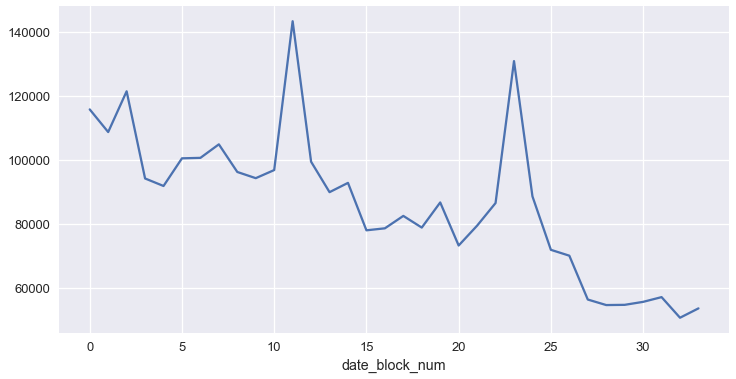

In [72]:
data.groupby("date_block_num").count()["money"].plot()

In [73]:
#check shop id
data.shop_id.value_counts(dropna=False).sort_index()


0       9857
1       5678
2      25991
3      25532
4      38242
5      38179
6      82663
7      58076
8       3412
9       3751
10     21397
11       499
12     34694
13     17824
14     36979
15     59511
16     52734
17     22950
18     53227
19     63911
20      1792
21     58133
22     45434
23      6963
24     53032
25    186104
26     53910
27    105366
28    142234
29     49225
30     50860
31    235636
32      7947
33      5027
34      5752
35     58445
36       306
37     39638
38     46013
39     13440
40      4257
41     41967
42    109253
43     39282
44     39530
45     35891
46     66321
47     56695
48     21612
49     15849
50     65173
51     44433
52     43502
53     52921
54    143480
55     34769
56     69573
57    117428
58     71441
59     42108
Name: shop_id, dtype: int64

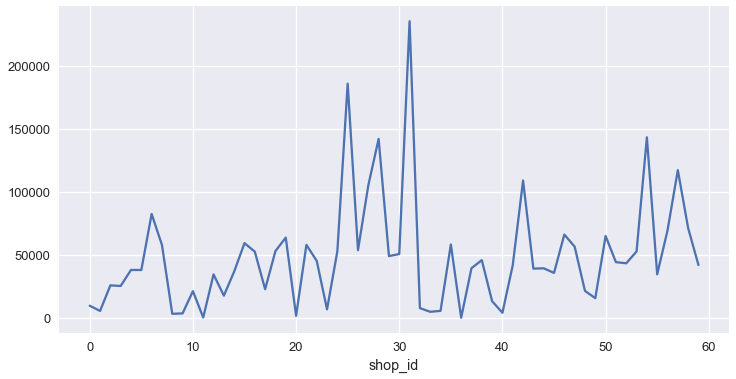

In [74]:
data.groupby("shop_id").count()["money"].plot()

In [75]:
# check item_id
data.item_id.value_counts(dropna=False).sort_index()


0           1
1           6
2           2
3           2
4           1
5           1
6           1
7           1
8           2
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          1
22          1
23          1
24          1
25          1
26          1
27         42
28         86
29         14
         ... 
22140     290
22141      48
22142      10
22143     647
22144     112
22145     286
22146      29
22147      63
22148       2
22149      35
22150      58
22151     283
22152      84
22153       9
22154      59
22155      75
22156       4
22157       4
22158       1
22159      14
22160      49
22161       1
22162     560
22163      71
22164     408
22165       2
22166     270
22167    1114
22168       6
22169       1
Name: item_id, Length: 21807, dtype: int64

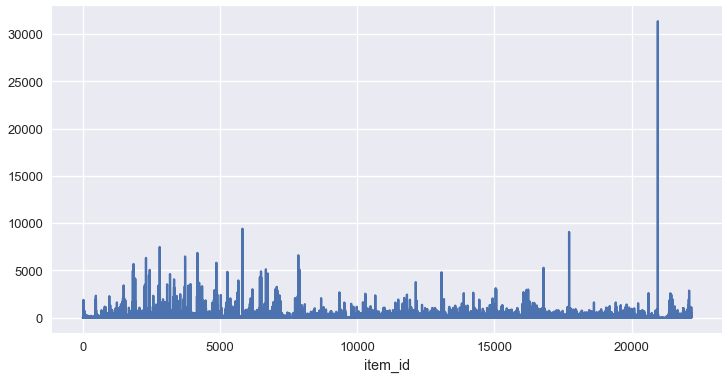

In [76]:
data.groupby("item_id").count()["money"].plot()

In [77]:
data.item_price.describe()

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

A negative price!

In [78]:
data=data[data.item_price>0]

In [79]:
data.item_price.describe()

count    2.935848e+06
mean     8.908535e+02
std      1.729800e+03
min      7.000000e-02
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

In [80]:
#All dates seem to be well formed. We seem to be good to go.
data[~data.date.apply(lambda x: len(x)==10)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,date_c,month,year,day,money


In [81]:
aggdata=transactions.drop(columns=["date","item_price"]).groupby(["date_block_num","shop_id","item_id"]).sum().reset_index()

In [82]:
aggdata[["shop_id","item_cnt_day"]].corr()

,shop_id,item_cnt_day
shop_id,1.00000,0.00027
item_cnt_day,0.00027,1.00000


In [83]:
shop2count=aggdata.groupby("shop_id").item_id.count().pipe(lambda x: x/x.sum()).reset_index()
shop2count.columns=["shop_id","encoded"]
aggdata.merge(shop2count,how="left")[["encoded","item_cnt_day"]].corr()

,encoded,item_cnt_day
encoded,1.000000,0.034544
item_cnt_day,0.034544,1.000000


In [84]:
shop2count=aggdata.groupby("shop_id").item_id.count().pipe(lambda x: np.log(x/x.sum())).reset_index()
shop2count.columns=["shop_id","encoded"]
aggdata.merge(shop2count,how="left")[["encoded","item_cnt_day"]].corr()

,encoded,item_cnt_day
encoded,1.000000,0.023913
item_cnt_day,0.023913,1.000000


In [85]:
shop2count=aggdata.groupby("item_id").shop_id.count().pipe(lambda x: x).reset_index()
shop2count.columns=["item_id","encoded"]
aggdata.merge(shop2count,how="left")[["encoded","item_cnt_day"]].corr()

,encoded,item_cnt_day
encoded,1.000000,0.137577
item_cnt_day,0.137577,1.000000


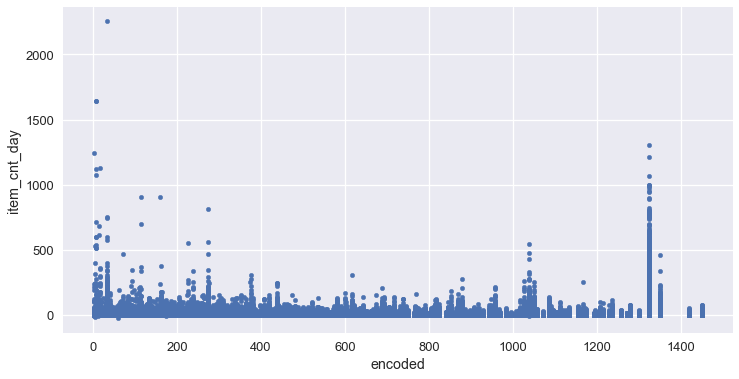

In [86]:
aggdata.merge(shop2count,how="left")[["encoded","item_cnt_day"]].plot.scatter("encoded","item_cnt_day")

In [87]:
shop2count=aggdata.groupby("item_id").shop_id.count().pipe(lambda x: np.log(x/x.sum())).reset_index()
shop2count.columns=["item_id","encoded"]
aggdata.merge(shop2count,how="left")[["encoded","item_cnt_day"]].corr()

,encoded,item_cnt_day
encoded,1.000000,0.087983
item_cnt_day,0.087983,1.000000


In [88]:
shop2count=aggdata.merge(items.drop(columns="item_name")).groupby("item_category_id").shop_id.count().pipe(lambda x: x/x.sum()).reset_index()
shop2count.columns=["item_category_id","encoded"]
aggdata.merge(items.drop(columns="item_name")).merge(shop2count,how="left")[["encoded","item_cnt_day"]].corr()

,encoded,item_cnt_day
encoded,1.000000,-0.048612
item_cnt_day,-0.048612,1.000000


In [89]:
prices=transactions.groupby(["date_block_num","item_id"]).item_price.mean().reset_index()

In [90]:
aggdata["item_cnt_day"]=np.clip(aggdata["item_cnt_day"],0,20)

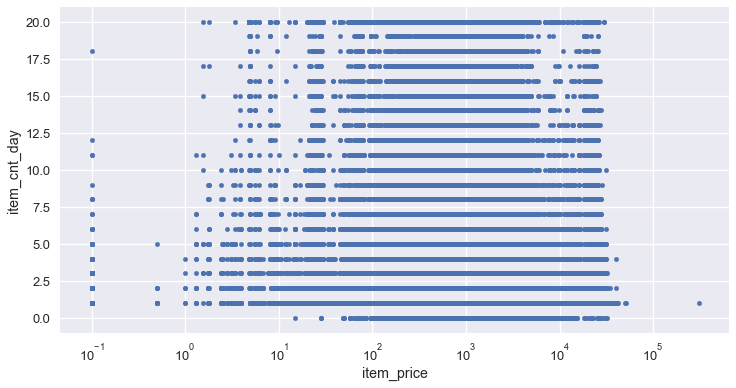

In [91]:
aggdata.merge(prices,how="left").plot.scatter("item_price","item_cnt_day")
plt.xscale("log")

In [92]:
shop_mean_price=aggdata.merge(prices,how="left").groupby("shop_id").item_price.mean().reset_index()
shop_mean_price.columns=["shop_id","item_price"]

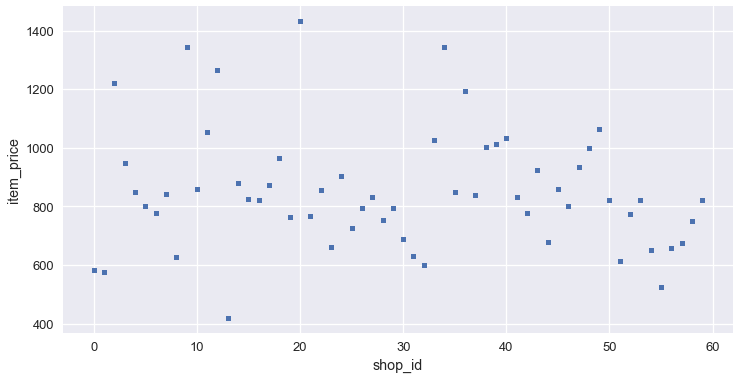

In [93]:
aggdata.merge(shop_mean_price,how="left").plot.scatter("shop_id","item_price")

In [94]:
mean_sold=(aggdata.groupby(["item_id","date_block_num"]).item_cnt_day.sum()
 .reset_index().groupby("item_id").item_cnt_day.mean()
).reset_index()
mean_sold.columns=["item_id","mean_sold"]

In [95]:
#Previous month reliability
p=[]

for i in range(2,33):
    mean_sold = (aggdata.query("date_block_num==(@i-1)").groupby(["item_id", "date_block_num"]).item_cnt_day.sum()
                 .reset_index().groupby("item_id").item_cnt_day.mean()
                 ).reset_index()
    mean_sold.columns = ["item_id", "mean_sold"]
    cor=aggdata.query("date_block_num==@i").merge(
        mean_sold, how="left").corr().mean_sold.item_cnt_day
    p.append(cor)

In [96]:
#All month
p2=[]
mean_sold = (aggdata.groupby(["item_id", "date_block_num"]).item_cnt_day.sum()
                 .reset_index().groupby("item_id").item_cnt_day.mean()
                 ).reset_index()
mean_sold.columns = ["item_id", "mean_sold"]
for i in range(2,33):

    cor=aggdata.query("date_block_num==@i").merge(
        mean_sold, how="left").corr().mean_sold.item_cnt_day
    p2.append(cor)

In [97]:
#Previous2 reliability
p3=[]

for i in range(2,33):
    
    mean_sold = (aggdata.query("date_block_num in [@i-1,@i-2]").groupby(["item_id", "date_block_num"]).item_cnt_day.sum()
                 .reset_index().groupby("item_id").item_cnt_day.mean()
                 ).reset_index()
    mean_sold.columns = ["item_id", "mean_sold"]
    cor=aggdata.query("date_block_num==@i").merge(
        mean_sold, how="left").corr().mean_sold.item_cnt_day
    p3.append(cor)

In [98]:
#A year back
p4=[]

for i in range(12,33):
    
    mean_sold = (aggdata.query("date_block_num ==( @i-12)").groupby(["item_id", "date_block_num"]).item_cnt_day.sum()
                 .reset_index().groupby("item_id").item_cnt_day.mean()
                 ).reset_index()
    mean_sold.columns = ["item_id", "mean_sold"]
    cor=aggdata.query("date_block_num==@i").merge(
        mean_sold, how="left").corr().mean_sold.item_cnt_day
    p4.append(cor)

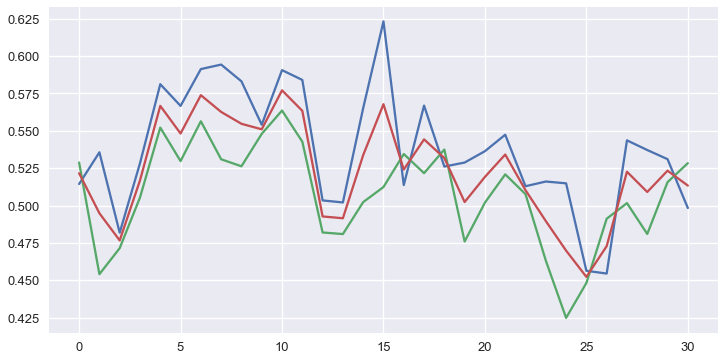

In [99]:
plt.plot(p)
plt.plot(p2)
plt.plot(0.5*(np.array(p)+np.array(p2)))

In [100]:
prices.groupby(["item_id"]).item_price.agg(["mean","std"])

,mean,std
item_id,,
0,58.000000,NaN
1,4490.000000,0.000000
2,58.000000,0.000000
3,79.000000,29.698485
4,58.000000,NaN
5,28.000000,NaN
6,100.000000,NaN
7,28.000000,NaN
8,58.000000,0.000000


In [101]:
(aggdata
 .merge(items.drop(columns="item_name"),how="left").merge(prices,how="left")
 [["item_category_id","item_price","date_block_num"]]
 .groupby(["date_block_num","item_category_id"]).mean().reset_index()
 .groupby("item_category_id").item_price.std().fillna(0).agg(["mean","std"])
)

mean     379.536094
std     1001.867986
Name: item_price, dtype: float64

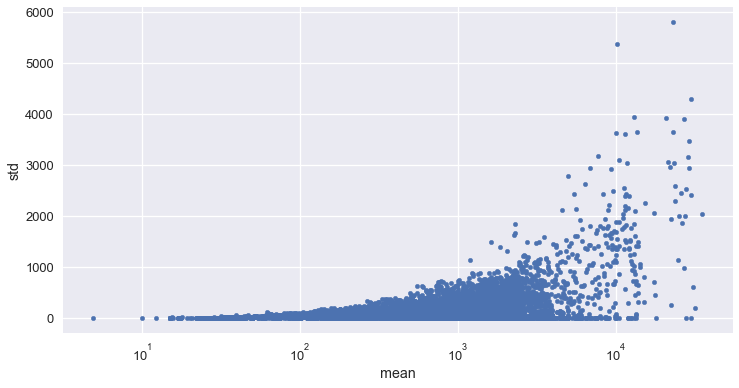

In [102]:
(aggdata
 .merge(items.drop(columns="item_name"),how="left").merge(prices,how="left")
 [["item_id","item_price","date_block_num"]]
 .groupby(["date_block_num","item_id"]).mean().reset_index()
 .groupby("item_id").item_price.agg(["mean","std"]).plot.scatter("mean","std")
)
plt.xscale("log")


In [153]:
t=(aggdata.query("shop_id in [0,1,2,3]").groupby(["shop_id","item_id"])
   .apply(lambda x: x.set_index("date_block_num").item_cnt_day.ewm(alpha=0.7).mean())
  )

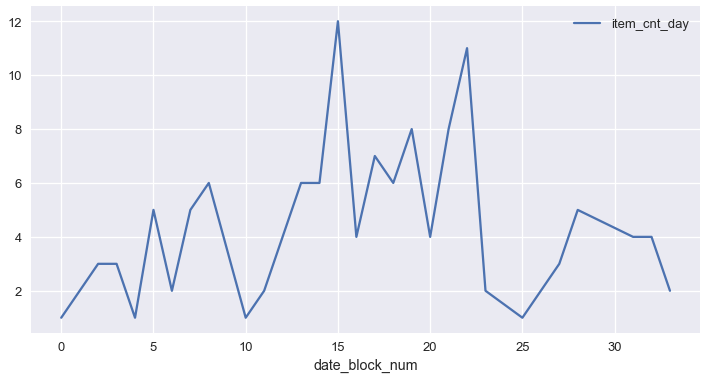

In [150]:
aggdata.query("item_id==5822 and shop_id==2").plot("date_block_num","item_cnt_day")

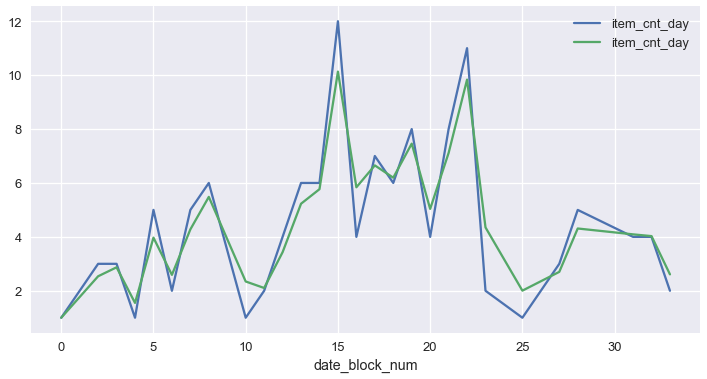

In [154]:
aggdata.query("item_id==5822 and shop_id==2").plot("date_block_num","item_cnt_day")
t.reset_index().query("item_id==5822 and shop_id==2").plot("date_block_num","item_cnt_day",ax=plt.gca())

In [166]:
aggdata.query("item_id==32 and shop_id==2")

,date_block_num,shop_id,item_id,item_cnt_day
687724,12,2,32,1.0
788748,14,2,32,1.0
975026,18,2,32,1.0
1067221,20,2,32,2.0
1107644,21,2,32,2.0
1195994,23,2,32,2.0
1343434,26,2,32,1.0
1514429,31,2,32,1.0


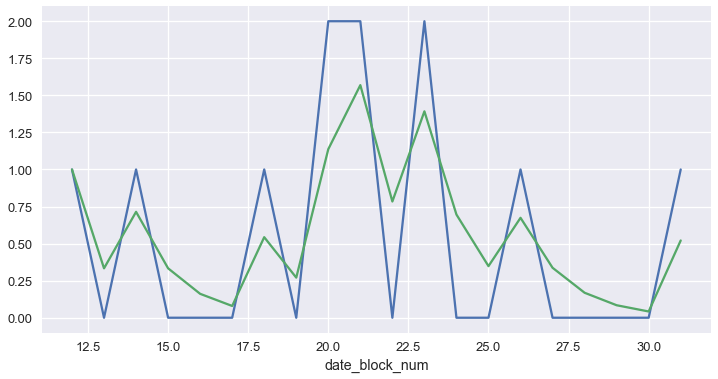

In [221]:
alls=pd.DataFrame({"date_block_num":np.arange(12,32)})
alls.merge(aggdata.reset_index().query("item_id==32 and shop_id==2"),how="left").set_index("date_block_num").fillna(0).item_cnt_day.plot()

alls.merge(aggdata.reset_index().query("item_id==32 and shop_id==2"),how="left").fillna(0).set_index("date_block_num").ewm(alpha=0.5).mean().item_cnt_day.plot()